In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append(str(Path("..").resolve()))
from src import *

# Filter only objects having one diffusion texture
##### ℹ️ This notebook requires `dataset/objaverse/2-annotations_filtered_by_thumbnails.parquet`. It also requires the `statistics.parquet` file generated by `compute_statistics.py`.
This notebook downloads all the filtered objects and filter them based on the the textures they have.

In [3]:
statistics = pd.read_parquet(ObjaverseDataset3D.DATASET_PATH /"statistics.parquet")
statistics.head()

,meshCount,uvCount,diffuseCount,uvScore
uid,,,,
0001857bb75b4357a26e364905cf80d6,1,1,0,0.974487
000234d39e684deb80b7b8d028681dc1,1,1,0,0.0
0003d163594b48c091661f79ec7cc18e,3,<NA>,<NA>,<NA>
0004bc12fb844671a714cd9815e2930f,3,<NA>,<NA>,<NA>
00058811f940427289a4b64048d2bca8,16,<NA>,<NA>,<NA>


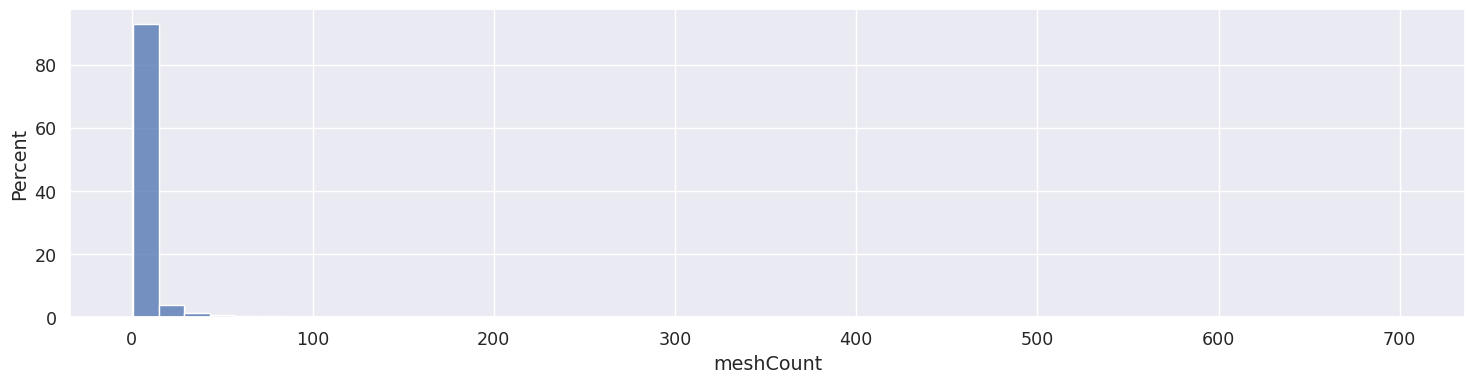

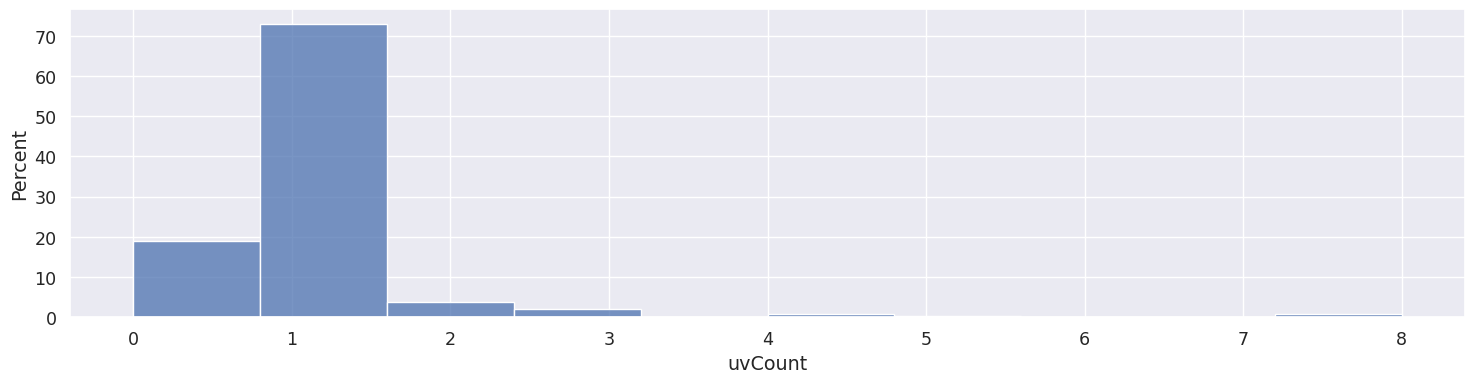

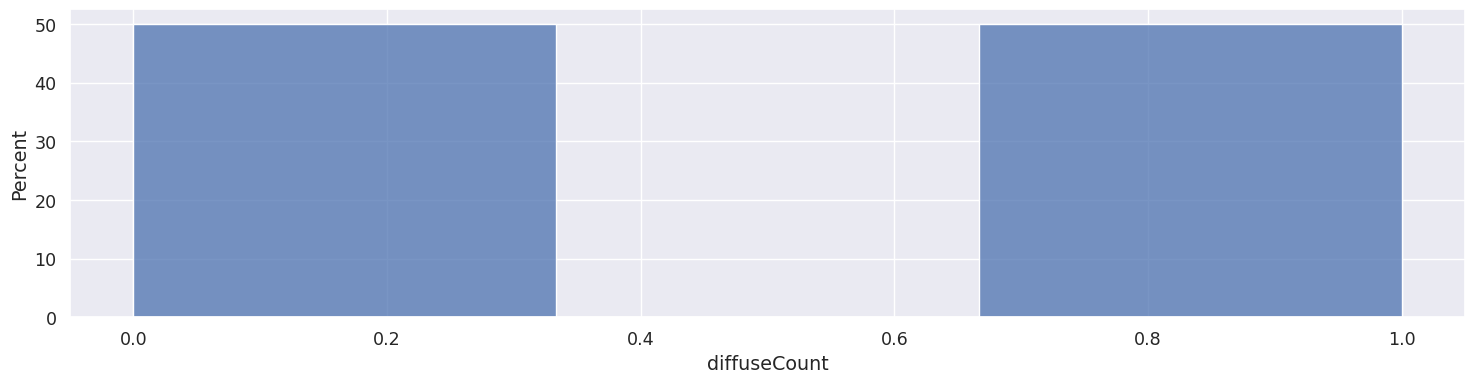

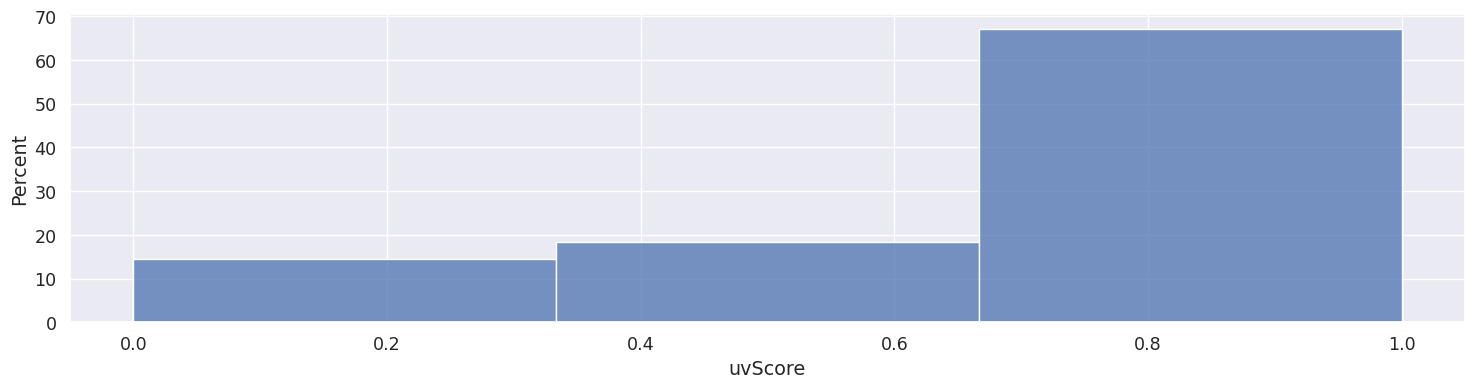

In [7]:
for data in [statistics["meshCount"], statistics["uvCount"], statistics["diffuseCount"], statistics["uvScore"]]:
    plt.figure(figsize=(18, 4))
    sns.histplot(data, bins=min(50, int(max(data.dropna()) + 2)), stat="percent")
    plt.show()

## How many GLB files have 1 Mesh, 1 UV map and 1 diffuse texture?
Let's check the number of meshes per GLB file first. This takes a random sample of 100 objects. To process the whole dataset, we need a computational node (see [get_statistics.py](get_statistics.py)), otherwise the login node kills the jupyter server after 1000 objects or so.

##### 👉🏼 About $50\%$ of GLB files contain 1 and only one mesh object.

##### 👉🏼 About $75\%$ of them have exactly 1 UV map.

##### 👉🏼 About $60\%$ of them have exactly 1 UV map.
Thus we end up with about $50\% \times 75\% \times 60\% = 22.5\%$ meeting the requirements.

In [ ]:
statistics = pd.read_parquet("statistics.parquet")
percentage = (statistics["diffuseCount"] == 1).sum() / len(statistics) * 100
f"{percentage:.2f}% of GLBs meet the requirements"

'24.30% of GLBs meet the requirements'